In [8]:
from google.colab import drive
drive.mount('/AData')


Mounted at /AData


## **Polynomial regression on nonlinear data**

***1. Abstract***

Fitting polynomial regression models is a common technique
in the analysis of nonlinear data, especially when facing problems of underfitting and overfitting. In this project, we explore how polynomial regression can approximate nonlinear functions using time series data and noisy data. The task is to find the optimal polynomial model for different data sets, evaluating its performance by calculating the Mean Square Error (MSE).



***2. Content***


We combine steps 2 and 3.

Find the best degree of the polynomial regression model and measure the Mean Squared Error (MSE).



MSE training:  0.011412720056714138
MSE on test data:  0.01072563046154999


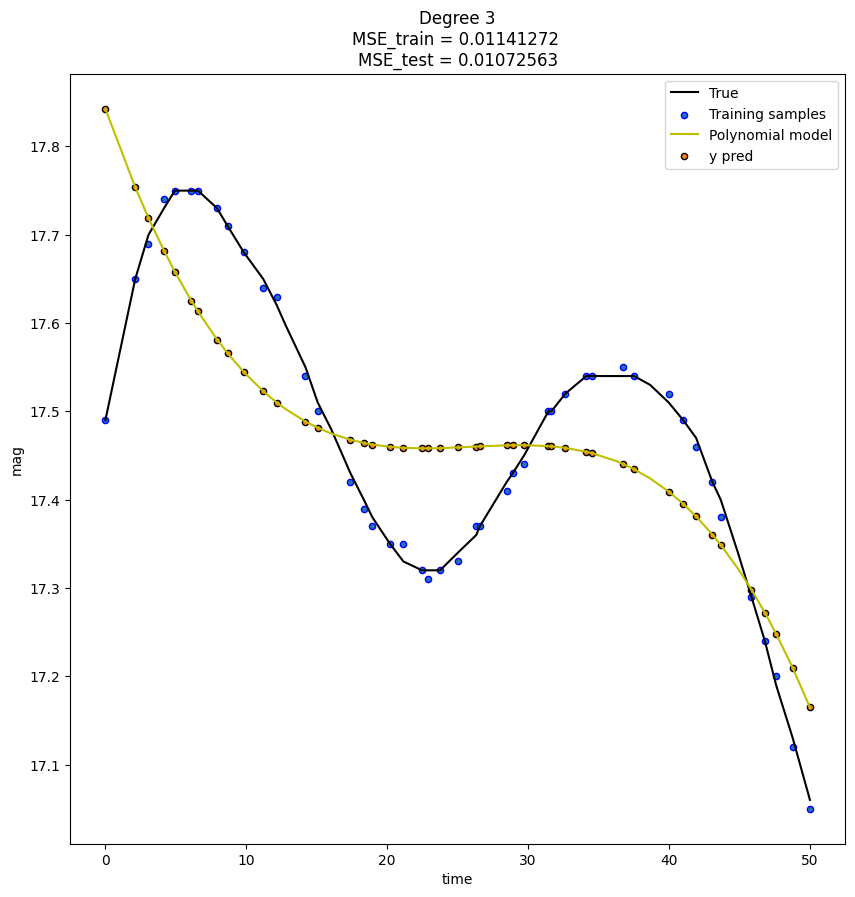

In [20]:
#Metrics
from sklearn.metrics import mean_squared_error
#Load data
import pandas as pd
TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Using pandas to read the data
data_path = '/content/drive/MyDrive/'
d_true = pd.read_csv(data_path + TRUE,header=None)
d_noise1 = pd.read_csv(data_path + NOISE1,header=None)
d_noise2 = pd.read_csv(data_path + NOISE2,header=None)

#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression

degree = 3 #polynomial degree

#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = d_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y.values.reshape(-1,1) # Y[:, np.newaxis]

#Training on noisy data
model.fit(x, y)  #get polynomial model for training data

X_test = d_true[0]
Y_test = d_true[1]

x_test = X_test.values.reshape(-1,1) #X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1)  #Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x)
y_pred_test = model.predict(x_test)


#Calculating MSE
MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE training: ",MSE_train)
print("MSE on test data: ",MSE_test)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='y', label="Polynomial model")

plt.scatter(x, y_pred_train, edgecolor='k', s=20, label="y pred")

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()


MSE training:  7.908729011005597e-05
MSE on test data:  8.198096666152133e-05


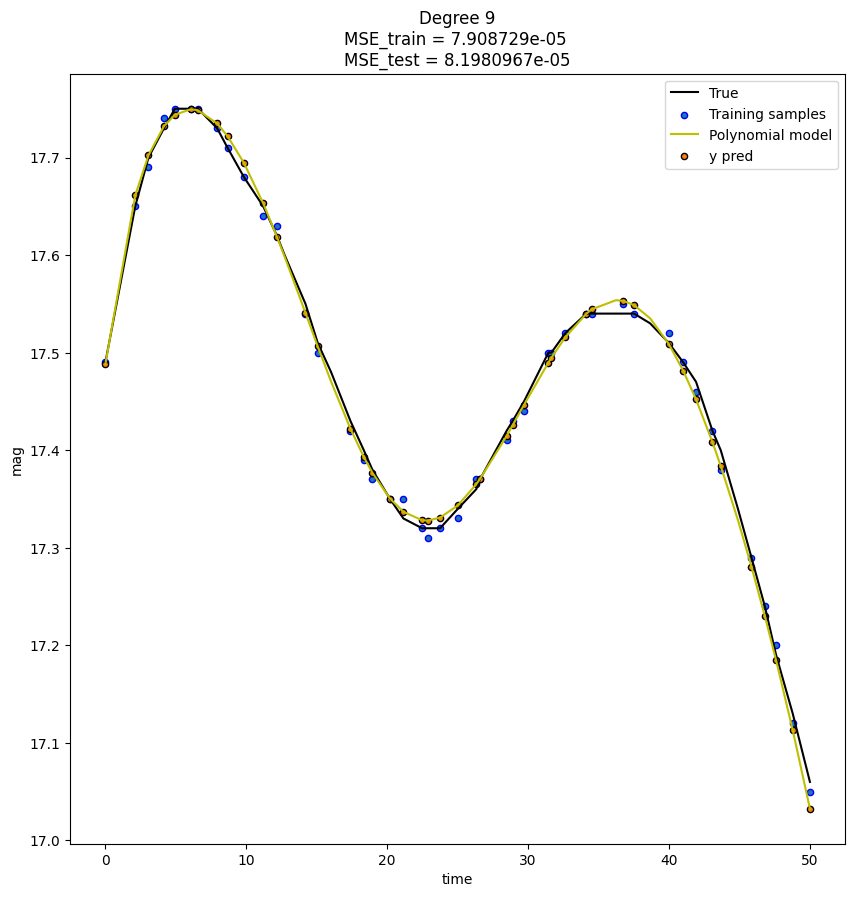

In [21]:
#Metrics
from sklearn.metrics import mean_squared_error
#Load data
import pandas as pd
TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Using pandas to read the data
data_path = '/content/drive/MyDrive/'
d_true = pd.read_csv(data_path + TRUE,header=None)
d_noise1 = pd.read_csv(data_path + NOISE1,header=None)
d_noise2 = pd.read_csv(data_path + NOISE2,header=None)

#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression

degree = 9 #polynomial degree

#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = d_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y.values.reshape(-1,1) # Y[:, np.newaxis]

#Training on noisy data
model.fit(x, y)  #get polynomial model for training data

X_test = d_true[0]
Y_test = d_true[1]

x_test = X_test.values.reshape(-1,1) #X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1)  #Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x)
y_pred_test = model.predict(x_test)

#Calculating MSE
MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE training: ",MSE_train)
print("MSE on test data: ",MSE_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='y', label="Polynomial model")

plt.scatter(x, y_pred_train, edgecolor='k', s=20, label="y pred")

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

MSE training:  0.014826134136843278
MSE on test data:  0.013565265328031477


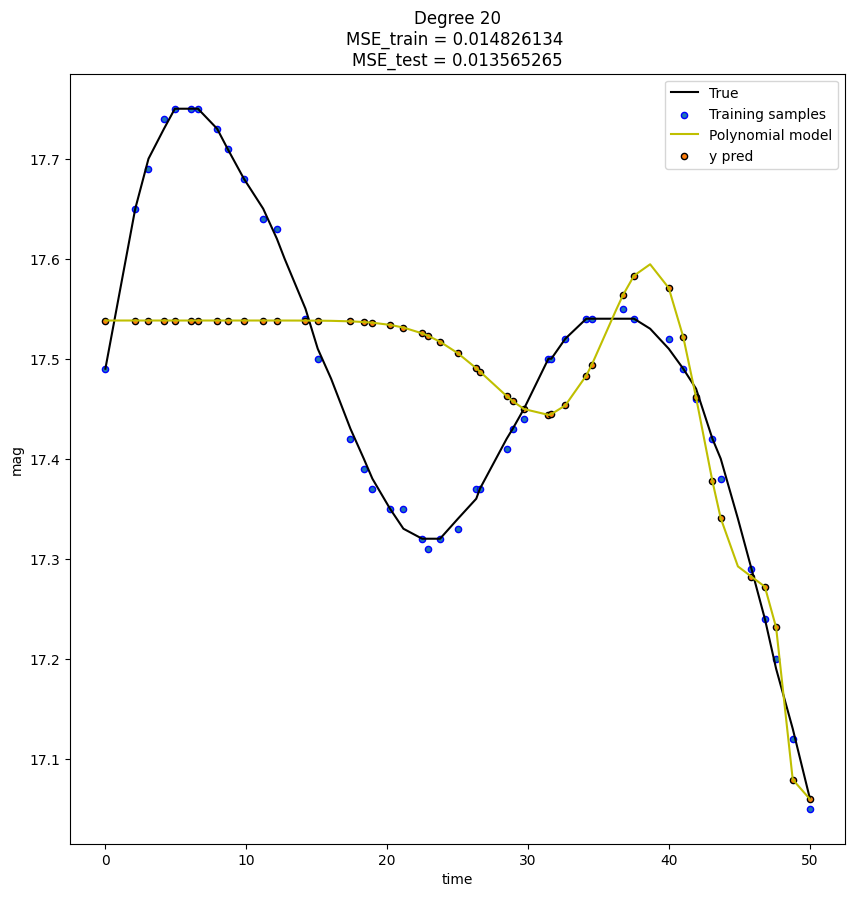

In [19]:
#Metrics
from sklearn.metrics import mean_squared_error
#Load data
import pandas as pd
TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Using pandas to read the data
data_path = '/content/drive/MyDrive/'
d_true = pd.read_csv(data_path + TRUE,header=None)
d_noise1 = pd.read_csv(data_path + NOISE1,header=None)
d_noise2 = pd.read_csv(data_path + NOISE2,header=None)

#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression

degree = 20 #polynomial degree

#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = d_noise1[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y.values.reshape(-1,1) # Y[:, np.newaxis]

#Training on noisy data
model.fit(x, y)  #get polynomial model for training data

X_test = d_true[0]
Y_test = d_true[1]

x_test = X_test.values.reshape(-1,1) #X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1)  #Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x)
y_pred_test = model.predict(x_test)

#Calculating MSE
MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE training: ",MSE_train)
print("MSE on test data: ",MSE_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='y', label="Polynomial model")

plt.scatter(x, y_pred_train, edgecolor='k', s=20, label="y pred")

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

Step 5: Get the best polynomial model for the following time series: DS-5-1-GAP-5-1-N-3_v2.dat  (noise: 0.466%)

We need to fit polynomial models to the dataset with noise and evaluate the best polynomial degree.

MSE training:  0.0030792673108692957
MSE on test data:  0.002791480600377364


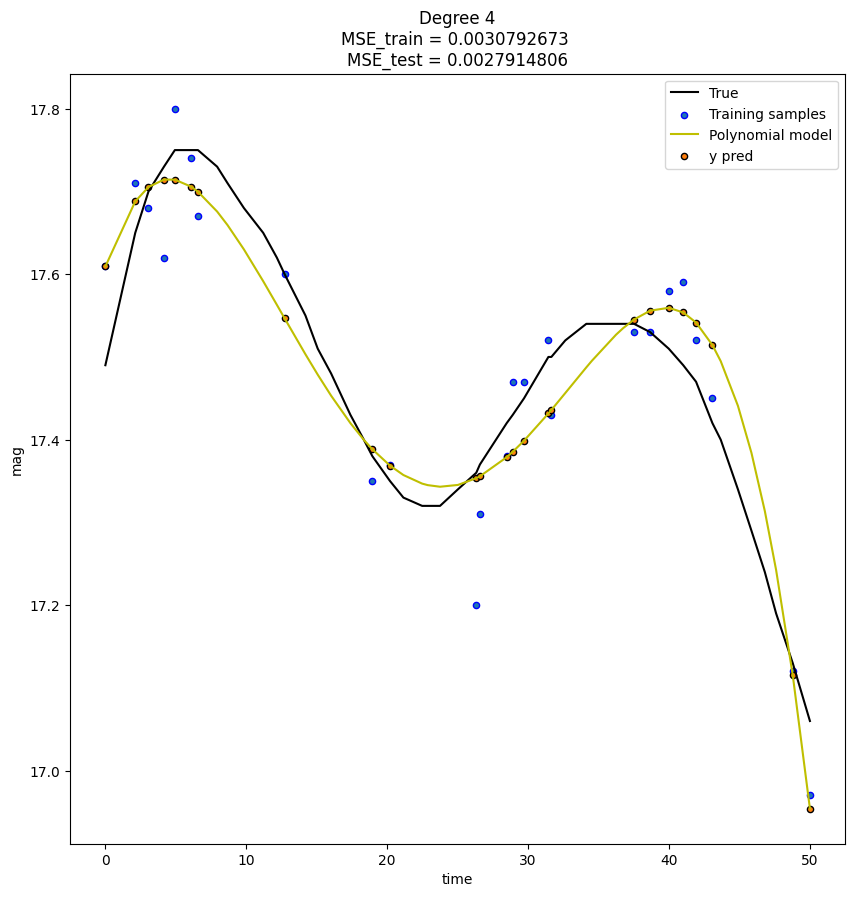

In [27]:
#Metrics
from sklearn.metrics import mean_squared_error
#Load data
import pandas as pd
TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Using pandas to read the data
data_path = '/content/drive/MyDrive/'
d_true = pd.read_csv(data_path + TRUE,header=None)
d_noise1 = pd.read_csv(data_path + NOISE1,header=None)
d_noise2 = pd.read_csv(data_path + NOISE2,header=None)

#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression

degree = 4 #polynomial degree

#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = d_noise2[0]  #time
x = X.values.reshape(-1,1) #X[:, np.newaxis]
Y = d_noise2[1]  #mag_A
y = Y.values.reshape(-1,1) # Y[:, np.newaxis]

#Training on noisy data
model.fit(x, y)  #get polynomial model for training data

X_test = d_true[0]
Y_test = d_true[1]

x_test = X_test.values.reshape(-1,1) #X_test[:, np.newaxis]
y_test = Y_test.values.reshape(-1,1)  #Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x)
y_pred_test = model.predict(x_test)

#Calculating MSE
MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE training: ",MSE_train)
print("MSE on test data: ",MSE_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(x, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='y', label="Polynomial model")

plt.scatter(x, y_pred_train, edgecolor='k', s=20, label="y pred")

plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

***3.Conclusion***

This study highlights the importance of selecting the appropriate polynomial degree to avoid underfitting and overfitting problems. A systematic approach, using cross-validation and MSE evaluation, is crucial for effective model fitting in nonlinear problems.